In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

C:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading the microarray gene expression dataset
prostate  = pd.read_csv('prostatemattest.txt', header=None,sep='\t')

#lu.isnull().values.any()
prostate.head(3)

,0,1,2,3,4,5,6,7,8,9,...,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533
0,-11.4,2.7,0.6,4.3,28,0.3,-17.5,-5.4,7.5,-0.9,...,4.1,2.5,5,22.5,7.3,14,19.3,-39.5,37.3,1
1,-1.0,-1.0,0.0,-1.0,3,0.0,-3.0,1.0,-2.0,0.0,...,10.0,2.0,4,5.0,1.0,6,6.0,0.0,26.0,1
2,-9.0,-19.0,0.0,0.0,76,9.0,-57.0,35.0,23.0,3.0,...,-66.0,12.0,14,59.0,16.0,-13,-10.0,-156.0,-21.0,1


In [3]:
#dividing the data into train-test and labeled- u dataset to 
y = prostate.iloc[:,[-1]]
X = prostate.iloc[:,:-2]

In [4]:
# total number of entries and shape of the dataset
print ('total number of sample:'+str(len(prostate.index)))
print ('total number of gene present:'+str((prostate.shape[1]-1)))
print ('dimention of the dataset:'+str(prostate.shape))

total number of sample:102
total number of gene present:12533
dimention of the dataset:(102, 12534)


In [5]:
#null value entries dataset
sum(prostate.isnull().sum())

0

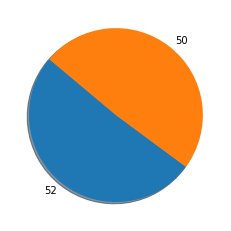

percent for class value :
12533
2        50.980392
1        49.019608
dtype: float64


In [6]:
#pie graph for TARGET and its percentage and imbalance 
plt.pie(y.value_counts(),labels=y.value_counts(),shadow=True, startangle=140) 
plt.show()
print('percent for class value :')
print (100*(y.value_counts()/len(y.index)))


In [7]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-8.552941,-4.640196,0.309804,1.434314,26.754902,-5.908824,-21.122549,0.525490,8.563725,-1.695098,...,16.738235,68.645098,-6.597059,5.563725,17.166667,20.887255,6.199020,7.931373,13.679412,-53.622549
std,12.460382,6.931836,4.185749,6.781344,30.729557,18.394425,21.544961,12.233695,17.264923,4.080535,...,23.108247,55.685431,22.305407,8.618329,23.175219,22.445964,10.054628,12.767735,38.277725,56.525445
min,-98.000000,-33.000000,-16.000000,-11.000000,-3.000000,-96.000000,-87.000000,-55.000000,-80.000000,-16.000000,...,-25.000000,11.000000,-110.000000,-12.000000,-10.000000,-4.000000,-6.000000,-13.000000,-71.000000,-187.000000
25%,-10.000000,-7.000000,-1.000000,-2.000000,7.000000,-8.750000,-30.000000,-3.000000,-0.750000,-3.000000,...,6.000000,31.250000,-9.750000,1.000000,5.000000,5.250000,0.000000,1.000000,-3.750000,-81.000000
50%,-5.000000,-3.000000,0.000000,0.000000,14.000000,-1.000000,-13.000000,0.000000,6.000000,-1.000000,...,11.000000,48.500000,2.000000,3.000000,12.000000,11.000000,3.000000,6.000000,5.500000,-27.500000
75%,-2.000000,-1.000000,1.000000,3.000000,32.750000,1.000000,-4.250000,3.750000,14.000000,0.000000,...,19.000000,90.750000,7.000000,7.000000,20.750000,27.000000,7.825000,12.000000,21.000000,-11.250000
max,7.000000,19.000000,17.000000,38.000000,182.000000,25.000000,3.000000,46.000000,61.000000,15.000000,...,114.000000,291.000000,18.000000,47.000000,140.000000,118.000000,52.000000,97.000000,173.000000,0.000000


In [8]:
#PCA 

In [9]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(X)
x_pca = pca.transform(X)

x_pca.shape


(102, 2)

Text(0, 0.5, 'Second Principal Component')

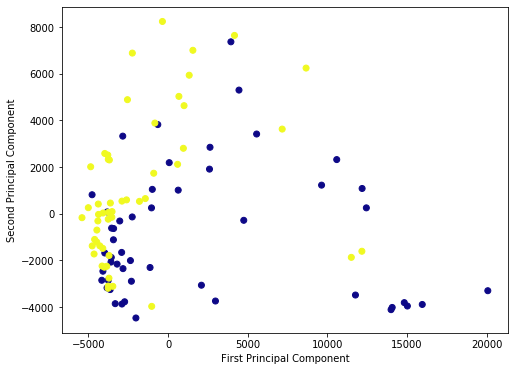

In [12]:
# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = y[12533], cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


In [13]:
#y